## Algoritmos de Machine Learnig: Caso Titanic

El objetivo de este cuaderno es seguir un flujo de trabajo paso a paso, explicando cada paso y la justificación de cada decisión que tomamos durante el desarrollo de la solución de un problema de analítica de datos.

Etapas a seguir:

1. Definición de pregunta o problema.
2. Adquirir datos de entrenamiento y pruebas.
3. Discutir, preparar, limpiar los datos.
4. Analizar, identificar patrones y explorar los datos.
5. Modelizar, predecir y resolver el problema.
6. Visualizar, informar y presentar los pasos de resolución del problema y la solución final.

#### Objetivo de Solución

Sabiendo a partir de un conjunto de datos de entrenamiento que contiene datos de los pasajeros que sobrevivieron o no al desastre del Titanic, crearemos modelos que utilicen diversos algoritmos de Machine Learning y que posteriorment pueden determinar en base a un conjunto de datos de prueba dado (que no contiene la información de supervivencia), si estos pasajeros en el conjunto de datos de prueba sobrevivieron o no.

### 1. Definición de pregunta o problema.

El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulación. 

Tasa de supervivencia traducida del 32%.

Una de las razones por las que el naufragio provocó tantas pérdidas de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación.

Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

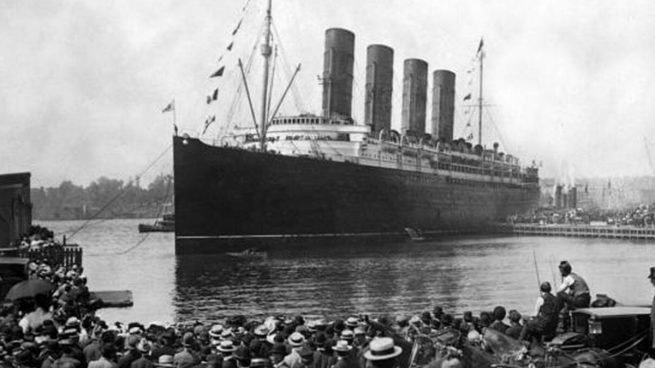

### Objetivos de analítica


A continuacion, resolveremos siete objetivos principales, importantes en Ciencia de Datos:

***Clasificación***. Es posible que queramos clasificar o categorizar nuestras datos (muestras). También es posible que deseemos comprender las implicaciones o la correlación de diferentes clases con nuestro objetivo de solución.

***Correlación*** Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. 
* ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? 
* Hablando estadísticamente, ¿existe una correlación entre una característica y el objetivo de la solución? 
* A medida que cambian los valores de las caracteristicas, ¿cambia también el estado de la solución y viceversa? 
Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado. También es posible que deseemos determinar la correlación entre características distintas de la supervivencia para los objetivos posteriores y las etapas del flujo de trabajo. Correlacionar ciertas características puede ayudar a crear, completar o corregir características.

***Conversión (transformación)*** Para la etapa de modelado, es necesario preparar los datos. Dependiendo de la elección del algoritmo del modelo, se puede requerir que todas las características se conviertan a valores numéricos equivalentes. Por ejemplo, convertir valores categóricos de texto en valores numéricos.

***Datos faltantes*** La preparación de datos también puede requerir que estimemos los valores faltantes dentro de una característica. Los algoritmos de modelo pueden funcionar mejor cuando no faltan valores.

***Corrección de datos*** También podemos analizar el conjunto de datos de entrenamiento dado en busca de errores o posiblemente valores inexactos dentro de las características e intentar corregir estos valores o excluir las muestras que contienen los errores. Una forma de hacer esto es detectar cualquier valor atípico entre nuestras muestras o características. También podemos descartar por completo una característica si no contribuye al análisis o puede sesgar significativamente los resultados.

***Creación de datos*** ¿Podemos crear nuevas características basadas en una característica existente o un conjunto de características, de modo que la nueva característica siga los objetivos de correlación, conversión e integridad?

***Visualización Gráfica*** Cómo seleccionar los gráficos y diagramas de visualización correctos según la naturaleza de los datos y los objetivos de la solución.

### 2. Adquirir datos de entrenamiento y pruebas

In [36]:
# Librerias para análisis de datos
import pandas as pd
import numpy as np
import random as rnd

# Para visualizacion de datos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Para machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


Los paquetes de Python Pandas nos ayudan a trabajar con nuestros conjuntos de datos. Comenzamos adquiriendo los conjuntos de datos de entrenamiento y prueba en Pandas DataFrames. También combinamos estos conjuntos de datos para ejecutar ciertas operaciones en ambos conjuntos de datos juntos.

In [37]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
data_df = [train_df, test_df]

### 3. Discutir, preparar, limpiar los datos

#### 3.1. Análisis exploratorio de los datos

In [38]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Deberemos preguntarnos y analizar:

* **¿Qué características son categóricas?**

Estos valores clasifican las muestras en conjuntos de muestras similares. Dentro de las características categóricas, ¿los valores se basan en valores nominales, ordinales, de razón o de intervalo? Entre otras cosas, esto nos ayuda a seleccionar los gráficos adecuados para la visualización.


* **¿Qué características son numéricas?**

¿Qué características son numéricas? Estos valores cambian de una muestra a otra. Dentro de las características numéricas, ¿los valores son discretos, continuos o basados en series temporales? Entre otras cosas, esto nos ayuda a seleccionar los gráficos adecuados para la visualización.


In [40]:
# previsualizacion de los datos
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **¿Qué características son tipos de datos mixtos?**

Datos numéricos y alfanuméricos dentro de la misma función. Estos son candidatos para corregir la meta.

Ticket es una combinación de tipos de datos numéricos y alfanuméricos. La cabina es alfanumérica.

* **¿Qué funciones pueden contener errores o errores tipográficos?**

Esto es más difícil de revisar para un conjunto de datos grande, sin embargo, revisar algunas muestras de un conjunto de datos más pequeño puede decirnos directamente qué características pueden requerir corrección.

La función de nombre puede contener errores o errores tipográficos, ya que hay varias formas de describir un nombre, incluidos títulos, corchetes y comillas para nombres alternativos o cortos.

In [41]:
# previsualizacion de los datos
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


* **¿Qué características contienen valores en blanco, nulos o vacíos?**

Estos requerirán corrección.

Cabin > Age > Embarked contienen varios valores nulos en ese orden para el conjunto de datos de entrenamiento.

Cabin> Age están incompletos en el caso del conjunto de datos de prueba.

* **¿Cuáles son los tipos de datos para varias caracteristicas?**


*** Siete características son números enteros o flotantes. 

***  Seis en el caso de un conjunto de datos de prueba.

***  Cinco características son de tipo cadena (objeto).

In [42]:
# Analizamos informacion de los conjuntos de datos de entranamiento y prueba
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**¿Cuál es la distribución de valores de características numéricas en las muestras?**

Esto nos ayuda a determinar, entre otras ideas iniciales, qué tan representativo es el conjunto de datos de entrenamiento del dominio del problema real.

* Las muestras totales son 891 o el 40% del número real de pasajeros a bordo del Titanic (2224).

* Survived es una característica categórica con valores 0 o 1.

* Alrededor del 38% de las muestras sobrevivieron representativa de la tasa de supervivencia real al 32%.

* La mayoría de los pasajeros (> 75%) no viajaron con padres o hijos.

* Casi el 30% de los pasajeros tenían hermanos y / o cónyuge a bordo.

* Las tarifas variaron significativamente y pocos pasajeros (<1%) pagaron hasta $ 512.

* Pocos pasajeros de edad avanzada (<1%) con edades comprendidas entre los 65 y los 80 años.

In [43]:
train_df.describe()
# Revisamos la tasa de supervivencia usando `percentiles=[.61, .62]` 
# conociendo que en la descripcion del problema menciona una tasa de 33% de supervivencia
# Revise la distribución de Parch usando `percentiles = [. 75, .8]`
# Distribución SibSp `[.68, .69]`
# Age y Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**¿Cuál es la distribución de las características categóricas?**


* Los nombres son únicos en todo el conjunto de datos (count=unique=891)

* Variable de sexo como dos valores posibles con 65% de hombres (top=male, freq=577/count=891).

* Los valores de cabina tienen varios duplicados en las muestras. Alternativamente, varios pasajeros compartieron una cabina.

* Embarked toma tres valores posibles. Puerto S utilizado por la mayoría de los pasajeros (top=S)

* La variable ticket tiene una alta proporción (22%) de valores duplicados (unique=681).

In [44]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### 3.2. Determinar los supuestos basados en el análisis de los datos 

Llegamos a los siguientes supuestos basados en el análisis de datos realizado hasta ahora. Podemos validar estas suposiciones aún más antes de tomar las medidas adecuadas.

**Correlación**

Queremos saber qué tan bien se correlaciona cada característica con la caracteristica **Survival**. Queremos hacer esto al principio de nuestro proyecto y hacer coincidir estas correlaciones rápidas con correlaciones modeladas más adelante en el proyecto.

**Datos incompletos**

1. Es posible que deseemos completar la variable Edad (Age), ya que definitivamente está correlacionada con la supervivencia.

2. Es posible que deseemos completar la tambien la variable **Embarked**, ya que también puede correlacionarse con la supervivencia u otra característica importante.

**Datos incorrectos**

1. La variable Ticket puede eliminarse de nuestro análisis ya que contiene una alta proporción de duplicados (22%) y es posible que no haya una correlación entre Ticket y supervivencia.

2. La característica de cabina puede descartarse porque está muy incompleta o contiene muchos valores nulos tanto en el conjunto de datos de entrenamiento como de prueba.

3. PassengerId puede eliminarse del conjunto de datos de entrenamiento ya que no contribuye a la supervivencia.

4. La característica nombre (del pasajero) es relativamente no estándar, puede que no contribuya directamente a la supervivencia, por lo que tal vez se elimine.


**Creacion de nuevos datos**

1. Es posible que deseemos crear una nueva característica llamada **Familia** basada en Parch y SibSp para obtener el recuento total de miembros de la familia a bordo.

2. Es posible que deseemos diseñar la caracteristica Nombre para extraer el Title como una variable nueva.

3. Es posible que queramos crear una nueva variable para los niveles de edad. Esto convierte una característica numérica continua en una característica categórica ordinal.

4. También es posible que deseemos crear una variable de rango de tarifa si ayuda a nuestro análisis.

**Clasificación**

También podemos agregar a nuestras suposiciones basándonos en la descripción del problema mencionado anteriormente.

* Las mujeres (sexo = mujer) tenían más probabilidades de haber sobrevivido.

* Los niños (edad <?) Tenían más probabilidades de haber sobrevivido.

* Los pasajeros de clase alta (Pclass = 1) tenían más probabilidades de haber sobrevivido.


#### 3.3. Analizar mediante variables pivot

Para confirmar algunas de nuestras observaciones y suposiciones, podemos analizar rápidamente nuestras correlaciones de características haciendo pivotar las características entre sí. Solo podemos hacerlo en esta etapa para las características que no tienen valores vacíos. También tiene sentido hacerlo solo para características que son de tipo categórico (Sexo), ordinal (Pclass) o discreto (SibSp, Parch).

* **Pclass** Observamos una correlación significativa (> 0.5) entre Pclass = 1 y Survived (clasificación # 3). Decidimos incluir esta característica en nuestro modelo.

* **Sexo** Confirmamos la observación durante la definición del problema de que Sexo = mujer tuvo una tasa de supervivencia muy alta del 74% (clasificación n. ° 1).

* **SibSp** y **Parch** Estas características tienen una correlación cero para ciertos valores. Puede ser mejor derivar una característica o un conjunto de características a partir de estas características individuales (creación # 1).

In [45]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [46]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [47]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [48]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### 3.4. Analizar visualizando datos

Ahora podemos continuar confirmando algunas de nuestras suposiciones utilizando visualizaciones para analizar los datos.

**(a) Correlacionar características numéricas**

Comencemos por comprender las correlaciones entre las características numéricas y nuestro objetivo de solución (Survived).

Un gráfico de histograma es útil para analizar variables numéricas continuas como Edad, donde las bandas o rangos ayudarán a identificar patrones útiles. El histograma puede indicar la distribución de muestras utilizando contenedores definidos automáticamente o bandas de igual rango. Esto nos ayuda a responder preguntas relacionadas con bandas específicas (¿Tuvieron los bebés una mejor tasa de supervivencia?)

Hay que tener en cuenta que el eje x en las visualizaciones de historgram representa el recuento de muestras o pasajeros.

**Observaciones**

* Los bebés (edad <= 4) tuvieron una alta tasa de supervivencia.

* Los pasajeros más viejos (edad = 80) sobrevivieron.

* Un gran número de jóvenes de 15 a 25 años no sobrevivió.

* La mayoría de los pasajeros tienen entre 15 y 35 años.

**Decisiones**

Este simple análisis confirma nuestras suposiciones como decisiones para las etapas posteriores del flujo de trabajo.

* Deberíamos considerar la edad (nuestra clasificación de suposición n. ° 2) en nuestro modelo de entrenamiento.
* Completer los valores faltantes para la variable Age (Edad) para valores nulos (completando el n. ° 1).
* Deberíamos agrupar los grupos de edad (creando el n. ° 3).

d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


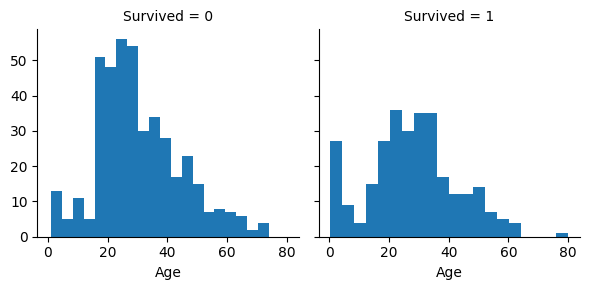

In [49]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**(b) Correlacionar características numéricas y ordinales**

Podemos combinar múltiples características para identificar correlaciones usando un solo gráfico. Esto se puede hacer con características numéricas y categóricas que tienen valores numéricos.

**Observaciones**

* Pclass = 3 tenía la mayoría de los pasajeros, sin embargo, la mayoría no sobrevivió. Confirma nuestro supuesto de clasificación n. ° 2.

* La mayoría de los pasajeros bebés de Pclass = 2 y Pclass = 3 sobrevivieron. Califica aún más nuestro supuesto de clasificación n. ° 2.

* La mayoría de los pasajeros de Pclass = 1 sobrevivieron. Confirma nuestro supuesto de clasificación n. ° 3.

* Pclass varía en términos de distribución por edad de los pasajeros.

**Decisiones**

Consideraremos **Pclass** para el entrenamiento de los modelos.

d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


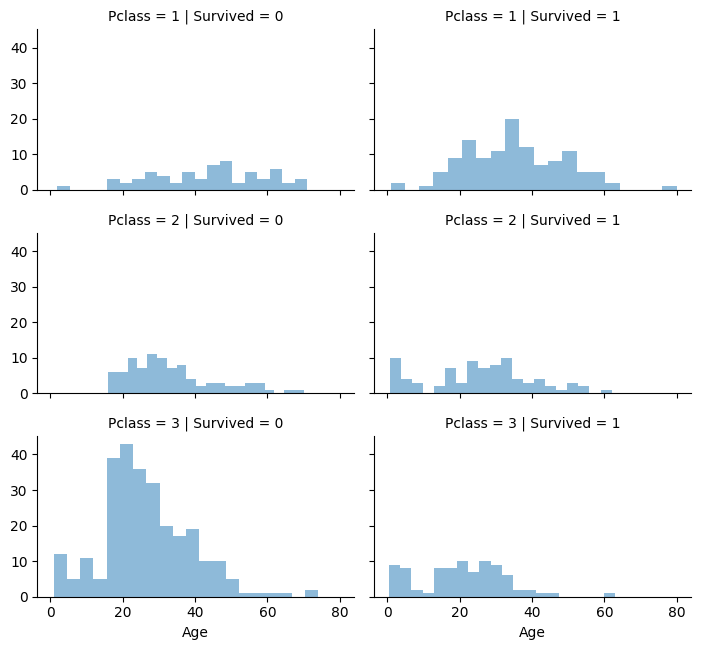

In [50]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**(c) Correlacionar características categóricas**

También es posible que deseemos correlacionar características categóricas (con valores no numéricos) y características numéricas. Podemos considerar correlacionar Embarked (categórico no numérico), Sex (categórico no numérico), Fare (numérico continuo), con Survived (categórico numérico).

**Observaciones**

* Los pasajeros que pagan tarifas más altas tienen una mejor supervivencia. Confirma nuestra suposición para crear (n. ° 4) rangos de tarifas.

* El puerto de embarque se correlaciona con las tasas de supervivencia. Confirma correlacionar (# 1) y completar (# 2).

**Decisiones**

Considerar la posibilidad de agregar niveles o rangos a la variable Fare (tarifa).

d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Codes\Artificial-Intelligence\.env\Lib

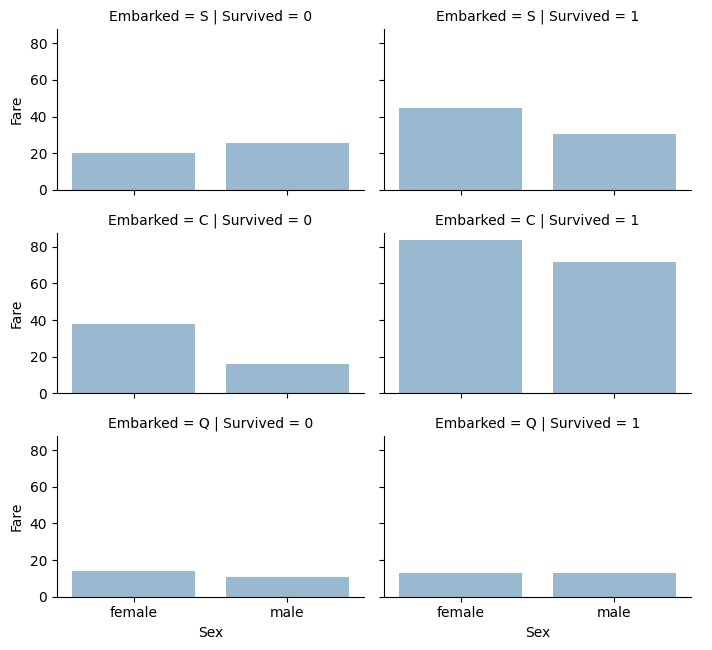

In [51]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived',height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\Artificial-Intellig

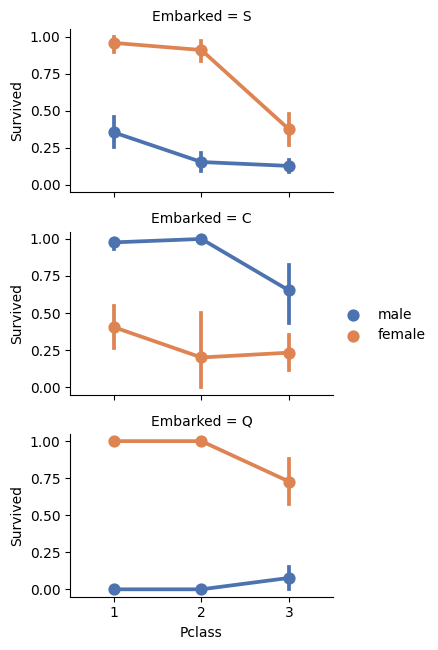

In [52]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

#### 3.5. Preparar y limpiar los datos

Hemos recopilado varias suposiciones y decisiones con respecto a nuestros conjuntos de datos y requisitos de solución. Hasta ahora no tuvimos que cambiar una sola característica o valor para llegar a estos. Ejecutemos ahora nuestras decisiones y suposiciones para corregir, crear y completar los datos.

**(a)Corregir eliminando características**

Al eliminar características, estamos tratando con menos datos. Acelera nuestro cálculo y facilita el análisis.

Basándonos en nuestras suposiciones y decisiones, queremos eliminar las características de Cabina (corrigiendo el n. ° 2) y Ticket (corrigiendo el n. ° 1).

Tener en cuenta que, cuando corresponda, realizaremos operaciones en conjuntos de datos de prueba y entrenamiento juntos para mantener la coherencia.

In [53]:
print("Antes", train_df.shape, test_df.shape, data_df[0].shape, data_df[1].shape)

# Eliminamos las caracteristicas Ticket y Cabina en cada dataset y los combinamos nuevamente

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
data_df = [train_df, test_df]

print("Despues", train_df.shape, test_df.shape, data_df[0].shape, data_df[1].shape)

Antes (891, 12) (418, 11) (891, 12) (418, 11)
Despues (891, 10) (418, 9) (891, 10) (418, 9)


#### (b) Crear nueva característica extraida de una existente 

Queremos analizar si la variable Nombre se puede utilizar para extraer Title (títulos) y probar la correlación entre títulos y supervivencia, antes de eliminar las variables Nombre y PassengerId.

En el siguiente código, extraeremos la característica de Título usando expresiones regulares. El patrón RegEx (\w+\.)coincide con la primera palabra que termina con un carácter de punto dentro de la variable Nombre. El parametro `expand=False` devuelve un DataFrame.

**Observaciones**

Cuando graficamos el título, la edad y los sobrevivientes, notamos las siguientes observaciones.

* La mayoría de los títulos clasifican los grupos de edad con precisión. Por ejemplo: el título de maestro tiene una edad media de 5 años.

* La supervivencia entre las bandas de Título de Edad varía ligeramente.

* Ciertos títulos sobrevivieron en su mayoría (Mme, Lady, Sir) o no (Don, Rev, Jonkheer).

**Decisión**

Decidimos conservar la nueva función de título para el entrenamiento de modelos.

In [54]:
for data in data_df:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Podemos reemplazar muchos títulos con un nombre más común o clasificarlos como "Raro".

In [55]:
for data in data_df:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Raro')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Raro,0.347826


Podemos convertir los títulos categóricos a ordinales.

In [56]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in data_df:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


Ahora podemos eliminar de forma segura la variable Nombre de los conjuntos de datos de entrenamiento y prueba. Tampoco necesitamos la variable PassengerId en el conjunto de datos de entrenamiento.

In [57]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
data_df = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### (c) Conversión de una característica categórica

Ahora podemos convertir características que contienen cadenas en valores numéricos. Esto es requerido por la mayoría de los algoritmos para crear modelos.

Comencemos por convertir la variable Sexo en una nueva variable llamada Género, donde mujer = 1 y hombre = 0

In [58]:
for data in data_df:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


#### (d) Completar datos faltantes en variables numericas continuas

Ahora deberíamos comenzar a estimar y completar características con valores faltantes o nulos. Primero haremos esto para la variable Age (Edad).

Podemos considerar tres métodos para completar una característica continua numérica.

1. Una forma sencilla es generar números aleatorios entre la media y la desviación estándar.

2. Una forma más precisa de adivinar los valores perdidos es utilizar otras características correlacionadas. En nuestro caso, notamos correlación entre Edad, Sexo y PClass. Adivinar los valores de Edad utilizando valores de mediana para Edad en conjuntos de combinaciones de características Pclass y Sexo. Entonces, la edad media para Pclass = 1 y Gender = 0, Pclass = 1 y Gender = 1, y así sucesivamente ...

3. Combinar los métodos 1 y 2. Entonces, en lugar de adivinar valores de edad basados en la mediana, utilizar números aleatorios entre la media y la desviación estándar, basados en conjuntos de combinaciones de Pclass y Gender.

Los métodos 1 y 3 introducirán ruido aleatorio en nuestros modelos. Los resultados de varias ejecuciones pueden variar. 

***Preferiremos el método 2***.

d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\Artificial-Intelligence\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


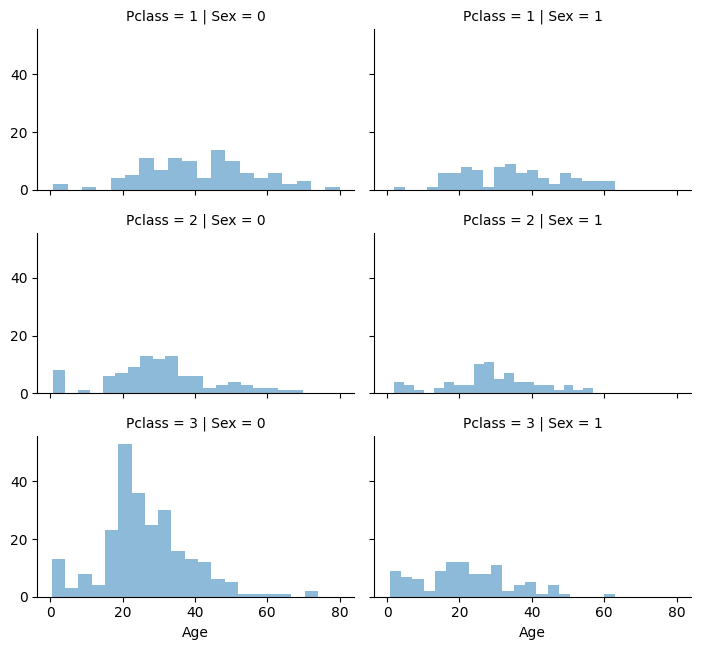

In [59]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Comencemos por preparar una matriz vacía para contener valores de edad adivinados basados en combinaciones de Pclass x Sex.

In [60]:
c_ages = np.zeros((2,3))
c_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Ahora iteramos sobre la variable Sex (0 o 1) y Pclass (1, 2, 3) para calcular los valores adivinados de Age (Edad) para las seis combinaciones.

In [61]:
for data in data_df:
    for i in range(0, 2):
        for j in range(0, 3):
            new_df = data[(data['Sex'] == i) & \
                          (data['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = new_df.mean()
            # age_std = new_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_new = new_df.median()

            # Convertimos el valor flotante de edad aleatorio a la edad .5 más cercana
            c_ages[i,j] = int( age_new/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                    'Age'] = c_ages[i,j]

    data['Age'] = data['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


Creemos niveles de edad y determinemos las correlaciones con la variable Survived (Sobrevivientes).

In [62]:
train_df['AgeRango'] = pd.cut(train_df['Age'], 5)
train_df[['AgeRango', 'Survived']].groupby(['AgeRango'], as_index=False).mean().sort_values(by='AgeRango', ascending=True)

C:\Users\pms_l\AppData\Local\Temp\ipykernel_8152\518777265.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeRango', 'Survived']].groupby(['AgeRango'], as_index=False).mean().sort_values(by='AgeRango', ascending=True)


,AgeRango,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Reemplacemos la variable Age con valores ordinales basados en estos rangos.

In [63]:
for data in data_df:    
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRango
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


Ahora podemos eliminar la variable AgeRango.

In [64]:
train_df = train_df.drop(['AgeRango'], axis=1)
data_df = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1.0
1,1,1,1,2,1,0,71.2833,C,3.0
2,1,3,1,1,0,0,7.9250,S,2.0
3,1,1,1,2,1,0,53.1000,S,3.0
4,0,3,0,2,0,0,8.0500,S,1.0


#### (e) Crear una nueva característica combinando características existentes 

Podemos crear una nueva variable para FamilySize que combine Parch y SibSp. Esto nos permitirá eliminar Parch y SibSp de nuestros conjuntos de datos.

In [65]:
for datas in data_df:
    datas['FamilySize'] = data['SibSp'] + data['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
5,6.0,0.666667
4,5.0,0.428571
0,1.0,0.418972
1,2.0,0.378378
2,3.0,0.368421
3,4.0,0.214286
6,7.0,0.000000
7,8.0,0.000000
8,11.0,0.000000


Podemos crear otra característica llamada **IsAlone**.

In [66]:
for data in data_df:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.369906
1,1,0.418972


Eliminemos las características Parch, SibSp y FamilySize en favor de **IsAlone**.

In [67]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data_df = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1.0,1
1,1,1,1,2,71.2833,C,3.0,0
2,1,3,1,1,7.9250,S,2.0,1
3,1,1,1,2,53.1000,S,3.0,1
4,0,3,0,2,8.0500,S,1.0,0


También podemos crear una variable artificial combinando Pclass y Age.

In [68]:
for data in data_df:
    data['Age*Class'] = data.Age * data.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### (f) Completar datos faltantes en variables categóricas

La característica **Embarked** toma valores S, Q, C según el puerto de embarque. Nuestro conjunto de datos de entrenamiento tiene dos valores perdidos. Simplemente los llenamos con la ocurrencia más común.

In [69]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [70]:
for data in data_df:
    data['Embarked'] = data['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### (g) Conversión de características categóricas a numéricas

Ahora podemos convertir la función Embarked a partir de una nueva variable de puerto (numérico).

In [71]:
for data in data_df:
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1.0,1,3
1,1,1,1,2,71.2833,1,3.0,0,2
2,1,3,1,1,7.9250,0,2.0,1,3
3,1,1,1,2,53.1000,0,3.0,1,2
4,0,3,0,2,8.0500,0,1.0,0,6


#### (h) Completar y convertir rápidamente una característica numérica

Ahora podemos completar la variable Fare (Tarifa) para el valor faltante único en el conjunto de datos de prueba usando "la moda" para obtener el valor que ocurre con más frecuencia para esta columna. Hacemos esto en una sola línea de código.

Tener en cuenta que no estamos creando una nueva característica intermedia ni realizando ningún análisis adicional de correlación para adivinar la característica faltante, ya que solo reemplazamos un valor. El objetivo de finalización logra el requisito deseado para que el algoritmo del modelo opere con valores no nulos.

También es posible que deseemos redondear la tarifa a dos decimales, ya que representa la moneda.

In [72]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


Ahora podemos crear un rango de tarifas en la variable FareRango.

In [73]:
train_df['FareRango'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareRango', 'Survived']].groupby(['FareRango'], as_index=False).mean().sort_values(by='FareRango', ascending=True)

C:\Users\pms_l\AppData\Local\Temp\ipykernel_8152\111880130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareRango', 'Survived']].groupby(['FareRango'], as_index=False).mean().sort_values(by='FareRango', ascending=True)


,FareRango,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convertimos la variable tarifa a valores ordinales basados en el rango de la tarifa.

In [74]:
for data in data_df:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

#Eliminamos la variable de rango de tarifa FareRango
train_df = train_df.drop(['FareRango'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1.0,1,3
1,1,1,1,2,3,1,3.0,0,2
2,1,3,1,1,1,0,2.0,1,3
3,1,1,1,2,3,0,3.0,1,2
4,0,3,0,2,1,0,1.0,0,6
5,0,3,0,1,1,2,1.0,1,3
6,0,1,0,3,3,0,1.0,1,3
7,0,3,0,0,2,0,4.0,0,0
8,1,3,1,1,1,0,3.0,1,3
9,1,2,1,0,2,1,3.0,0,0


Y el conjunto de datos de prueba.

In [75]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3
5,897,3,0,0,1,0,1.0,1,0
6,898,3,1,1,0,2,2.0,1,3
7,899,2,0,1,2,0,1.0,0,2
8,900,3,1,1,0,1,3.0,1,3
9,901,3,0,1,2,0,1.0,0,3


### 5. Modelizar, predecir y resolver el problema

Ahora estamos listos para entrenar un modelo y predecir la solución requerida. Hay más de 60 algoritmos de modelado predictivo para elegir. Debemos comprender el tipo de problema y el requisito de solución para limitarnos a unos pocos modelos seleccionados que podamos evaluar. Nuestro problema es un problema de clasificación y regresión. Queremos identificar la relación entre la salida (sobrevivido o no) con otras variables o características (género, edad, puerto ...). También estamos realizando una categoría de aprendizaje automático que se llama aprendizaje supervisado, ya que entrenamos nuestro modelo con un conjunto de datos determinado. Con estos dos criterios: aprendizaje supervisado más clasificación y regresión, podemos reducir nuestra elección de modelos a unos pocos. Estos incluyen:

* Regresión logística (Logistic Regression)
* KNN o k-Vecinos más cercanos (KNN or k-Nearest Neighbors)
* Máquinas de vectores de soporte (Support Vector Machines o SVM)
* Clasificador ingenuo de Bayes (Naive Bayes classifier)
* Árbol de decisión (Decision Tree)
* Bosque aleatorio (Random Forrest)
* Perceptrón
* Red neuronal artificial (Artificial neural network o ANN)
* RVM o máquina de vectores de relevancia (Relevance Vector Machine)

In [86]:
# Trabajaremos con variables X,Y de entranamiento y X para prueba
# X contendra todas las variables independientes, menos Survived (la variable dependiente)
# Y sera la variable dependiente Survived

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
# Eliminamos el Id del pasajero en el conjunto de datos de prueba
X_test  = test_df.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

#### Algoritmo de Regresión Logística

La regresión logística es un modelo útil para ejecutar al principio del flujo de trabajo. La regresión logística mide la relación entre la variable dependiente categórica (característica) y una o más variables independientes (características) mediante la estimación de probabilidades utilizando una función logística, que es la distribución logística acumulativa. Referencia [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Tener en cuenta la puntuación de confianza generada por el modelo en función de nuestro conjunto de datos de entrenamiento.

In [77]:
# Regresión logística

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.49

Podemos utilizar la regresión logística para validar nuestras suposiciones y decisiones para crear caracteristicas y conseguir los objetivos. Esto se puede hacer calculando el coeficiente de las características en la función de decisión.

Los coeficientes positivos aumentan las probabilidades logarítmicas de la respuesta (y por lo tanto aumentan la probabilidad) y los coeficientes negativos disminuyen las probabilidades logarítmicas de la respuesta (y por lo tanto disminuyen la probabilidad).

* El sexo es el coeficiente positivo más alto, lo que implica que a medida que aumenta el valor de Sexo (hombre: 0 a mujer: 1), la probabilidad de Sobrevivir = 1 aumenta más.

* A la inversa, a medida que aumenta Pclass, la probabilidad de Sobrevivir = 1 es la que más disminuye.

* De esta manera, Edad * Clase es una buena característica artificial para modelar, ya que tiene la segunda correlación negativa más alta con Survived.

* También lo es el título como la segunda correlación positiva más alta.

In [78]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Caracteristica']
coeff_df["Correlacion"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlacion', ascending=False)

,Caracteristica,Correlacion
1,Sex,1.837379
5,Title,0.760670
4,Embarked,0.314710
2,Age,0.212704
6,IsAlone,0.115533
7,Age*Class,-0.230065
3,Fare,-0.251279
0,Pclass,-1.094494


A continuación, modelamos utilizando Support Vector Machines, que son modelos de aprendizaje supervisado con algoritmos de aprendizaje asociados que analizan los datos utilizados para el análisis de clasificación y regresión. Dado un conjunto de muestras de entrenamiento, cada una marcada como perteneciente a una u otra de dos categorías , un algoritmo de entrenamiento de SVM crea un modelo que asigna nuevas muestras de prueba a una categoría u otra, convirtiéndolo en un clasificador lineal binario no probabilístico. Referencia [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

#### Algoritmo Support Vector Machines

In [79]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

79.24

#### Algoritmo KNN o k-Vecinos más cercanos

En el reconocimiento de patrones, el algoritmo k-Vecinos más cercanos (o k-NN para abreviar) es un método no paramétrico utilizado para clasificación y regresión. Una muestra se clasifica por mayoría de votos de sus vecinos, y la muestra se asigna a la clase más común entre sus k vecinos más cercanos (k es un número entero positivo, típicamente pequeño). Si k = 1, entonces el objeto simplemente se asigna a la clase de ese único vecino más cercano. Referencia [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

La puntuación de confianza KNN es mejor que la regresión logística.

In [80]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.31

#### Algoritmo Naive Bayes

En el aprendizaje automático, los clasificadores de Bayes ingenuos son una familia de clasificadores probabilísticos simples basados en la aplicación del teorema de Bayes con supuestos de independencia sólidos (ingenuos) entre las características. Los clasificadores Naive Bayes son altamente escalables y requieren un número de parámetros lineales en el número de variables (características) en un problema de aprendizaje. Referencia [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

El puntaje de confianza generado por el modelo es el más bajo entre los modelos evaluados hasta ahora.

In [81]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.08

#### Algoritmo Arbol de Decision

Este modelo utiliza un árbol de decisiones como modelo predictivo que asigna características (ramas de árboles) a conclusiones sobre el valor objetivo (hojas de árboles). Los modelos de árbol en los que la variable de destino puede tomar un conjunto finito de valores se denominan árboles de clasificación; en estas estructuras de árbol, las hojas representan etiquetas de clase y las ramas representan conjunciones de características que conducen a esas etiquetas de clase. Los árboles de decisión en los que la variable de destino puede tomar valores continuos (normalmente números reales) se denominan árboles de regresión. Referencia [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

El puntaje de confianza del modelo es el más alto entre los modelos evaluados hasta ahora.

In [82]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.43

#### Algoritmo Random Forrest

El siguiente modelo de bosques aleatorios es uno de los más populares. Los bosques aleatorios o los bosques de decisión aleatorios son un método de aprendizaje por conjuntos para la clasificación, regresión y otras tareas, que operan mediante la construcción de una multitud de árboles de decisión (n_estimators = 100) en el momento del entrenamiento y dando salida a la clase que es el modo de las clases (clasificación) o predicción media (regresión) de los árboles individuales. Referencia [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

El puntaje de confianza del modelo es el más alto entre los modelos evaluados hasta ahora. Decidimos utilizar la salida de este modelo (Y_pred) para crear la presentación de resultados de nuestra competencia.

In [83]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.43

#### Algoritmo del Perceptrón

El perceptrón es un algoritmo para el aprendizaje supervisado de clasificadores binarios (funciones que pueden decidir si una entrada, representada por un vector de números, pertenece a alguna clase específica o no). Es un tipo de clasificador lineal, es decir, un algoritmo de clasificación que hace sus predicciones basándose en una función de predicción lineal que combina un conjunto de pesos con el vector de características. El algoritmo permite el aprendizaje en línea, ya que procesa los elementos del conjunto de entrenamiento de uno en uno. Referencia  [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [84]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

63.3

### Evaluación del modelo

Ahora podemos clasificar nuestra evaluación de todos los modelos para elegir el mejor para nuestro problema. Si bien tanto el árbol de decisiones como el bosque aleatorio obtienen la misma puntuación, elegimos usar el bosque aleatorio, ya que corrigen el hábito de los árboles de decisión de adaptarse en exceso a su conjunto de entrenamiento.

In [85]:
modelos = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_decision_tree]})
modelos.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.43
6,Decision Tree,87.43
1,KNN,86.31
2,Logistic Regression,82.49
0,Support Vector Machines,79.24
4,Naive Bayes,75.08
5,Perceptron,63.30


### Referencias 

Este notebook ha sido creado en base a un gran trabajo realizado resolviendo la competencia Titanic y otras fuentes.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)